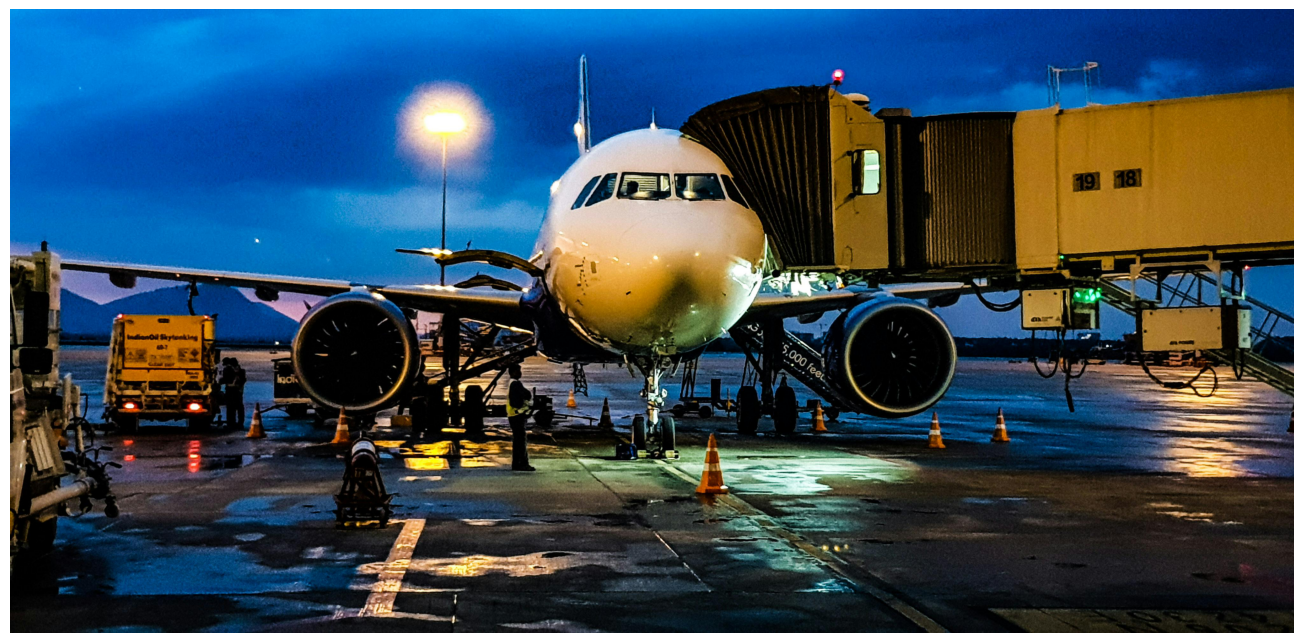

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread("pexels-soumya-ranjan-205042-1098745.jpg")

# Get the original image dimensions
original_height, original_width, _ = img.shape

# Define the desired maximum width or height (whichever is smaller)
max_dimension = 1000  # Adjust this value as needed

# Calculate the scale factor to fit the image within the maximum dimensions
scale_factor = min(max_dimension / original_width, max_dimension / original_height)

# Calculate the new width and height based on the scale factor
new_width = int(original_width * scale_factor)
new_height = int(original_height * scale_factor)

# Display the image with adjusted size
plt.figure(figsize=(new_width / 60, new_height / 60))  # Convert width and height to inches
plt.imshow(img)
plt.axis('off')
plt.show()

# Business Problem

- Our company has been providing high-quality air transportation service to our clients for several years, ensuring a safe, comfortable, and convenient journey for our passengers. We operate a diverse fleet of aircraft, ranging from small business jets to medium-sized machines. However, we currently face challenges due to various factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on the company's profitability, and we are actively seeking solutions to address this issue. In order to tackle this challenge, the company is planning to analyze their database and identify opportunities to increase the occupancy rate, thereby boosting the average profit earned per seat.

# Key Obstacles

-  Stricter environmental regulations: The airlines industry is facing increasing pressure to reduce its carbon footprint, leading to the implementation of more stringent environmental laws. These regulations not only raise operating costs but also restrict the potential for expansion.

-  Higher flight taxes: Governments worldwide are imposing heavier taxes on aircraft as a means to address environmental concerns and generate revenue. This increase in flight taxes has raised the overall cost of flying, subsequently reducing demand.
-  Tight labor market resulting in increased labor costs: The aviation sector is experiencing a scarcity of skilled workers, leading to higher labor costs and an increase in turnover rates.

##### Let's get started!!

In [47]:
#Importing Liberaries

import pandas as pd
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### List of Tables

In [54]:
#connect to sqlite database


conn = sqlite3.connect("travel.sqlite")
cur = conn.cursor()


tables = pd.read_sql("""SELECT *                                         
                        FROM sqlite_master
                        WHERE type='table';""", conn)        #In SQLite, the sqlite_master table is a system table that stores metadata about the database itself.
                                                                          #It contains information about all the tables, indexes, views, and triggers in the database. 
                                                                          #This table is automatically created by SQLite and is used by the SQLite engine to manage the database schema


#List of Tables
tables


,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
4,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
5,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
6,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...
7,table,df_aircraft,df_aircraft,26742,"CREATE TABLE ""df_aircraft"" (\n""aircraft_code"" ..."
8,table,bookings,bookings,5,"CREATE TABLE ""bookings"" (\n""book_ref"" TEXT,\n ..."
9,table,df_boarding_passes,df_boarding_passes,27136,"CREATE TABLE ""df_boarding_passes"" (\n""ticket_n..."


### Data Exploration

In [48]:
aircraft = pd.read_sql_query("select * from aircrafts_data",conn)

print(aircraft.head())

  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600


- It seems like we have data in other language
- we need to keep only understandable data

In [4]:
df = pd.DataFrame(aircraft)
df_model = []
for i in range(len(df)):
    model_data = json.loads(df.loc[i,'model'])    #json.loads, use to convert json into python dictionary>thus, we can easily access the dict element.
    df_model.append(model_data['en'])
print(df_model)

aircraft['df_model'] = df_model

df_aircraft = pd.DataFrame(aircraft[['aircraft_code','df_model','range']])
df_aircraft

['Boeing 777-300', 'Boeing 767-300', 'Sukhoi Superjet-100', 'Airbus A320-200', 'Airbus A321-200', 'Airbus A319-100', 'Boeing 737-300', 'Cessna 208 Caravan', 'Bombardier CRJ-200']


,aircraft_code,df_model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


- Once the JSON string is converted to a Python dictionary, we can easily access its elements using standard dictionary indexing or key access. This makes it straightforward to extract the specific data we need, such as the "en" value in your case.

In [5]:
airports = pd.read_sql_query("select * from airports_data",conn)
print(airports.head())

  airport_code                                       airport_name  \
0          YKS          {"en": "Yakutsk Airport", "ru": "Якутск"}   
1          MJZ            {"en": "Mirny Airport", "ru": "Мирный"}   
2          KHV  {"en": "Khabarovsk-Novy Airport", "ru": "Хабар...   
3          PKC        {"en": "Yelizovo Airport", "ru": "Елизово"}   
4          UUS  {"en": "Yuzhno-Sakhalinsk Airport", "ru": "Хом...   

                                                city  \
0                  {"en": "Yakutsk", "ru": "Якутск"}   
1                   {"en": "Mirnyj", "ru": "Мирный"}   
2            {"en": "Khabarovsk", "ru": "Хабаровск"}   
3  {"en": "Petropavlovsk", "ru": "Петропавловск-К...   
4  {"en": "Yuzhno-Sakhalinsk", "ru": "Южно-Сахали...   

                                 coordinates          timezone  
0      (129.77099609375,62.0932998657226562)      Asia/Yakutsk  
1    (114.03900146484375,62.534698486328125)      Asia/Yakutsk  
2      (135.18800354004,48.5279998779300001)  Asia/Vl

In [6]:
df_airport = pd.DataFrame(airports)
port_data = df_airport["airport_name"]
port_data

0              {"en": "Yakutsk Airport", "ru": "Якутск"}
1                {"en": "Mirny Airport", "ru": "Мирный"}
2      {"en": "Khabarovsk-Novy Airport", "ru": "Хабар...
3            {"en": "Yelizovo Airport", "ru": "Елизово"}
4      {"en": "Yuzhno-Sakhalinsk Airport", "ru": "Хом...
                             ...                        
99          {"en": "Murmansk Airport", "ru": "Мурманск"}
100             {"en": "Abakan Airport", "ru": "Абакан"}
101           {"en": "Barnaul Airport", "ru": "Барнаул"}
102    {"en": "Anapa Vityazevo Airport", "ru": "Витяз...
103           {"en": "Chulman Airport", "ru": "Чульман"}
Name: airport_name, Length: 104, dtype: object

In [7]:
#Extract airport name

df_airport = pd.DataFrame(airports)
port_data = df_airport['airport_name']

data_airport = []

for i in range(len(port_data)):
    x = json.loads(port_data.iloc[i])
    data_airport.append(x['en'])
data_airport

#extract city name

city_data = df_airport['city']

city_data1 = []

for i in range(len(city_data)):
    y = json.loads(port_data.iloc[i])
    city_data1.append(y['en'])
city_data1

#load both the extracted data into df_airport
df_airport['data_airport'] = data_airport
df_airport['city_data1'] = city_data1

#save required column into new dataframe
df1_airport = df_airport[['airport_code','data_airport','city_data1','coordinates']]
df1_airport

,airport_code,data_airport,city_data1,coordinates
0,YKS,Yakutsk Airport,Yakutsk Airport,"(129.77099609375,62.0932998657226562)"
1,MJZ,Mirny Airport,Mirny Airport,"(114.03900146484375,62.534698486328125)"
2,KHV,Khabarovsk-Novy Airport,Khabarovsk-Novy Airport,"(135.18800354004,48.5279998779300001)"
3,PKC,Yelizovo Airport,Yelizovo Airport,"(158.453994750976562,53.1679000854492188)"
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk Airport,"(142.718002319335938,46.8886985778808594)"
...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk Airport,"(32.7508010864257812,68.7817001342773438)"
100,ABA,Abakan Airport,Abakan Airport,"(91.3850021362304688,53.7400016784667969)"
101,BAX,Barnaul Airport,Barnaul Airport,"(83.5384979248046875,53.363800048828125)"
102,AAQ,Anapa Vityazevo Airport,Anapa Vityazevo Airport,"(37.3473014831539984,45.002101898192997)"


In [8]:
df_boarding_passes = pd.read_sql_query("select * from boarding_passes",conn)
df_boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [9]:
bookings = pd.read_sql_query("select * from bookings",conn)
bookings

,book_ref,book_date,total_amount,year
0,00000F,2017-07-05 03:12:00+03:00,265700,2017
1,000012,2017-07-14 09:02:00+03:00,37900,2017
2,000068,2017-08-15 14:27:00+03:00,18100,2017
3,000181,2017-08-10 13:28:00+03:00,131800,2017
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017


In [10]:
flights = pd.read_sql_query("select * from flights",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [11]:
flights.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'aircraft_code',
       'actual_departure', 'actual_arrival'],
      dtype='object')

In [12]:
seats = pd.read_sql_query("select * from seats",conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [13]:
ticket_flights = pd.read_sql_query("select * from ticket_flights",conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [14]:
tickets = pd.read_sql_query("select * from tickets",conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


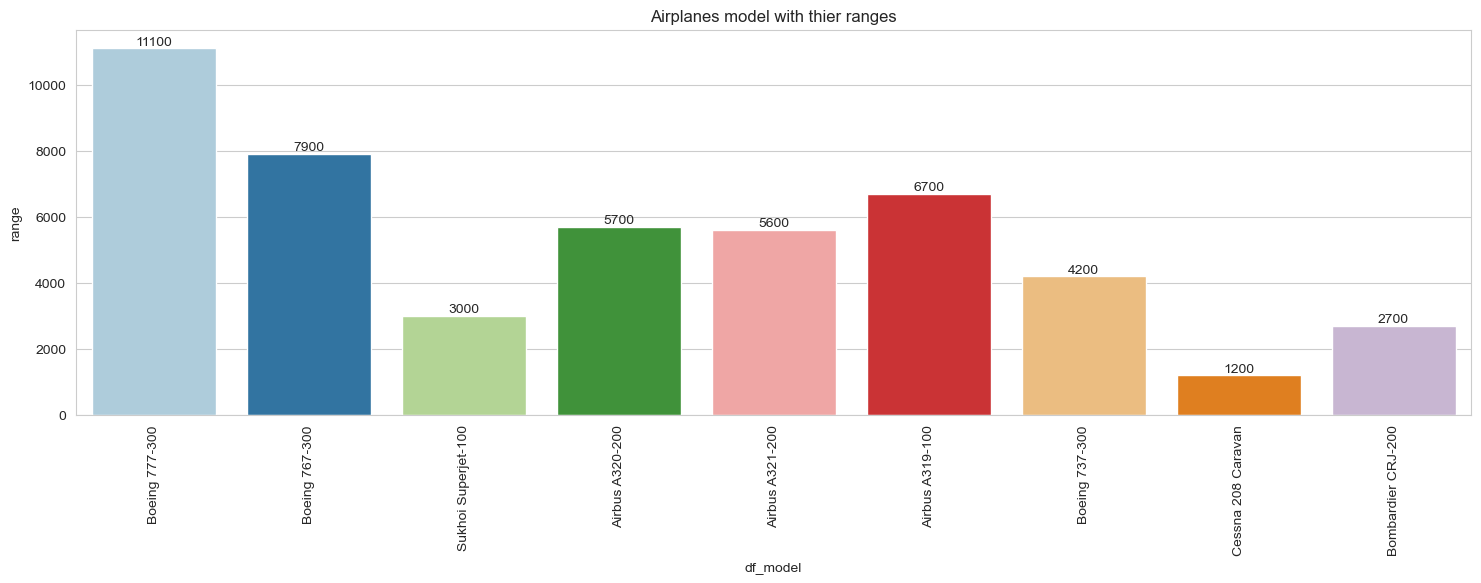

In [15]:
sns.set_style('whitegrid')
fig_axis = plt.subplots(figsize=(18,5))
ax = sns.barplot(x='df_model' ,y='range' , data = df_aircraft,palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Airplanes model with thier ranges')
plt.xticks(rotation = 90)
plt.show()

In [16]:
seats


,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [17]:


seats_over_100 = pd.DataFrame(pd.read_sql_query("""select aircraft_code, count(seat_no) as num_of_seats from seats 
group by aircraft_code having count(seat_no) > 100""",conn))

seats_over_100

,aircraft_code,num_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


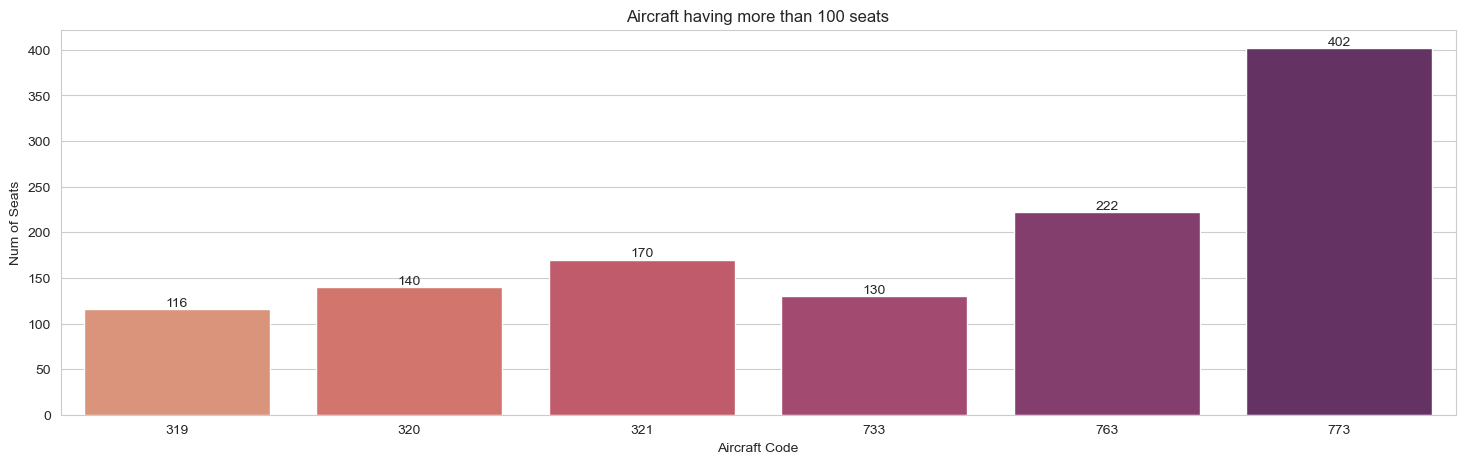

In [18]:
sns.set_style('whitegrid')
fig_axis = plt.subplots(figsize=(18,5))
an = sns.barplot(x="aircraft_code", y = "num_of_seats", data = seats_over_100, palette = "flare")

for container in an.containers:
    an.bar_label(container)

plt.title("Aircraft having more than 100 seats")
plt.xlabel("Aircraft Code")
plt.ylabel("Num of Seats")
plt.show()




In [19]:
# Save the DataFrame to the SQLite database

df_aircraft.to_sql('df_aircraft', conn, index=False, if_exists='replace')

pd.read_sql_query("select df_model, aircraft_code from df_aircraft where aircraft_code = 773",conn)

,df_model,aircraft_code
0,Boeing 777-300,773


## Observations

- Here we successfully derived the names of airplanes using their codes

- So it seems like " Boeing 777-300 " is having maximum number of seats (402).

## Number of tickets booked and total amount earned changed with the time

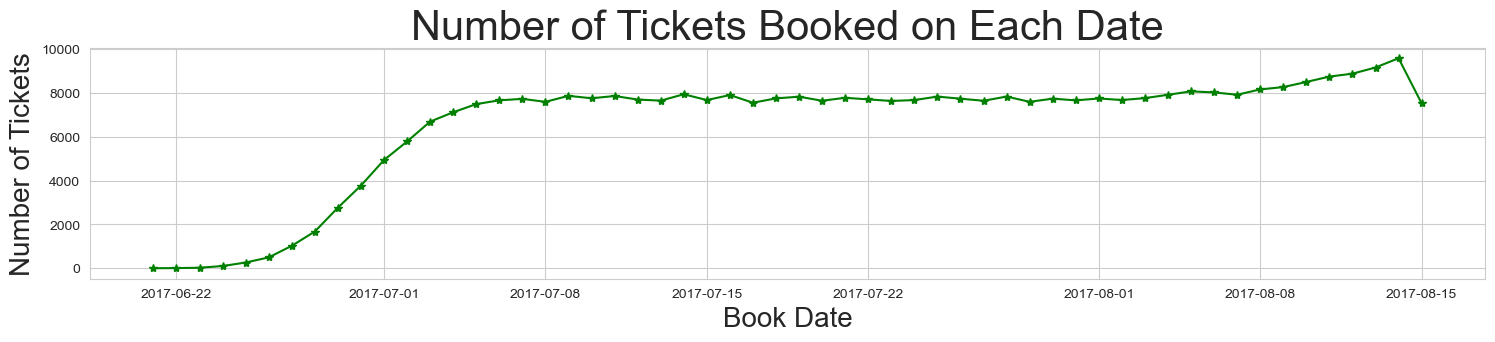

In [55]:
df_tickets = pd.read_sql_query("""select b.book_date, t.ticket_no, b.total_amount from bookings b inner join tickets t on b.book_ref = t.book_ref""",conn)


df_tickets['book_date'] = pd.to_datetime(df_tickets['book_date']).dt.date
tickets_data = df_tickets.groupby('book_date')[['book_date']].count()


plt.figure(figsize = (18,3))
am = plt.plot( tickets_data.index, tickets_data['book_date'], color='green', scalex=True, marker = "*")
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Book Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()



## Observation


- Ticket bookings gradually increased from June 22nd to July 7th.
- From July 8th to August, bookings were stable with a noticeable peak on one day.
- Revenue closely correlated with ticket bookings, following a similar trend.
- Exploring factors behind the peak in bookings could help boost revenue and optimize operationses.

# Fare Distribution for the flights

- merge three tables 1.flight, 2.tickets_flights, 3.df_aircraft

In [21]:
merged = pd.read_sql_query("""select f.flight_id, f.aircraft_code, t.fare_conditions, avg(t.amount) as Average_amt ,d.df_model from flights f 
left join ticket_flights t on f.flight_id = t.flight_id
left join df_aircraft d on f.aircraft_code = d.aircraft_code group by f.aircraft_code, t.fare_conditions""",conn)

merged

,flight_id,aircraft_code,fare_conditions,Average_amt,df_model
0,1192,319,None,NaN,Airbus A319-100
1,11847,319,Business,113550.557703,Airbus A319-100
2,1185,319,Economy,38311.402347,Airbus A319-100
3,4,321,None,NaN,Airbus A321-200
4,1,321,Business,34435.662664,Airbus A321-200
5,1,321,Economy,11534.974764,Airbus A321-200
6,1535,733,None,NaN,Boeing 737-300
7,11085,733,Business,41865.626175,Boeing 737-300
8,11085,733,Economy,13985.152000,Boeing 737-300
9,1316,763,None,NaN,Boeing 767-300


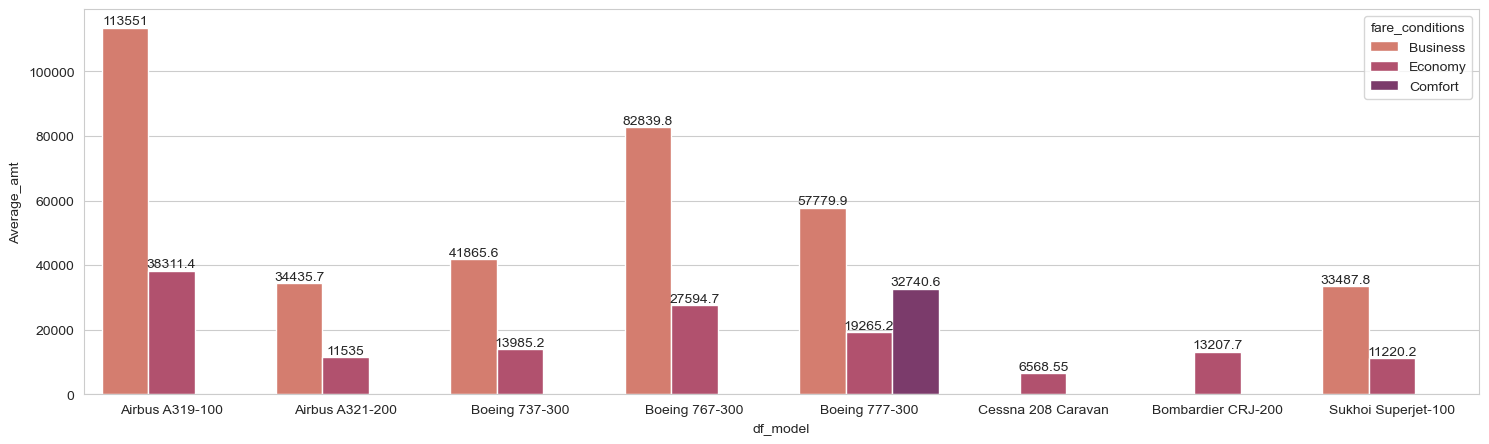

In [22]:
merged_df = merged[['fare_conditions', 'df_model', 'Average_amt']]
merged_df

sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(18,5))
ann = sns.barplot(x = 'df_model', y = 'Average_amt', hue = 'fare_conditions', data = merged_df, palette = 'flare')

for container in ann.containers:
    ann.bar_label(container)
plt.show()

### Obersvations

- "Airbus A319-100" has the highest average number of Business and Economy class seats.
- "Boeing 777-300" has the highest average number of Comfort seats.
.s.

# Examining Occupancy Rate
- To maximize profitability, airlines must analyze revenue streams, including overall income, average revenue per ticket, and occupancy rates.
This information helps identify profitable aircraft types, itineraries, and pricing optimization opportunities. The highest total revenue is generated by the SU9 aircraft, likely due to its lower ticket prices.
The CN1 aircraft has the lowest total revenue, possibly due to its limited economy class offering. Monitoring average occupancy rates helps airlines fill seats efficiently, increase revenue, and reduce expenses. 
Improving occupancy rates can be financially beneficial and achieved through pricing strategies and operational considerations. Airlines should focus on optimizing pricing strategies for gradual revenue growth.

#### Total Revenue per Year and Average Revenue per Ticket

In [23]:
year = pd.DataFrame(pd.to_datetime(bookings['book_date']).dt.year)
bookings['year'] = year
bookings

bookings.to_sql('bookings', conn, index=False, if_exists='replace')


pd.read_sql_query("""
SELECT  Ticket_count,  Total_amt,
    SUM(sub.total_amt) / SUM(sub.ticket_count) AS Avg_amt_per_ticket
FROM (
    SELECT 
        COUNT(t.ticket_no) AS Ticket_count, 
        SUM(b.total_amount) AS Total_amt
    FROM bookings b
    LEFT JOIN tickets t ON b.book_ref = t.book_ref
) sub
""",conn)

,Ticket_count,Total_amt,Avg_amt_per_ticket
0,366733,34320619200,93584


In [29]:

df_boarding_passes.to_sql('df_boarding_passes', conn, index=False, if_exists='replace')


occupancy_rate = pd.read_sql_query("""select AA.aircraft_code,avg(AA.seats_count) as booked_seats, BB.num_seats, 
avg(AA.seats_count)/BB.num_seats as occupancy_rate 
                        
from (select f.aircraft_code,f.flight_id,count(*) as seats_count from df_boarding_passes b
inner join flights f
on b.flight_id = f.flight_id
group by f.aircraft_code,f.flight_id) as AA
                    
inner join
(select aircraft_code,count(*) as num_seats from seats
group by aircraft_code) as BB on AA.aircraft_code = BB.aircraft_code group by AA.aircraft_code """, conn)

occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


## Calculating how much the total annual turnover would increase by giving all aircraft a 10% higher occupancy rate

In [30]:
occupancy_rate['inc_rate_by_10%'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1


In [44]:
#calculate total revenue

total_revenue = pd.read_sql_query("""select f.aircraft_code, sum(t.amount) as total_revenue from ticket_flights t  join flights f 
on f.flight_id = t.flight_id group by f.aircraft_code""",conn)

#
occupancy_rate['inc_Total_Annual_Turnover'] = (total_revenue['total_revenue']
                                                /occupancy_rate['occupancy_rate'])*occupancy_rate['inc_rate_by_10%']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_rate_by_10%,inc_Total_Annual_Turnover
0,319,53.583181,116,0.461924,0.508116,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5.625933e+09


## Conclusion

- In conclusion, airlines can maximize profitability by analyzing revenue data and making informed decisions. Factors such as total revenue, average revenue per ticket, and average occupancy per aircraft play a crucial role in this analysis. By identifying areas for improvement, adjusting pricing strategies, and optimizing routes, airlines can increase their profitability. However, it's important for airlines to consider consumer happiness and safety while striving for profit. Balancing these factors is key to long-term success in the competitive airline industry. Adopting a data-driven approach to revenue analysis and optimization can lead to sustainable growth and success.